In [1]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import model_from_json
from keras.utils import multi_gpu_model 
from keras.utils import to_categorical


Using TensorFlow backend.


Read the data
===========

In [3]:
x_original=pd.read_csv('../../_xlable4_withNa_AllColumns.txt')
y_original=pd.read_csv('../../_targelable4_withNa_AllColumns.txt')

x_original=x_original[['Unnamed: 0','L100200', 'AGE', 'S000100', 'L100700', 'L103800', 'L107500', 'L190300', 
                       'FIELD_42', 'L100500', 'FIELD_38']]

y_original=y_original[['Unnamed: 0','L100200']]

print(x_original.shape)
print(y_original.shape)


(159381, 11)
(159381, 2)


Prepare the data
============

In [4]:
data= pd.merge(x_original,y_original, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data=data.dropna(). reset_index()

print(data.shape)

(64846, 13)


In [5]:
print(data.shape)
print(data.columns)
data.head()

(64846, 13)
Index(['index', 'Unnamed: 0', 'L100200_x', 'AGE', 'S000100', 'L100700',
       'L103800', 'L107500', 'L190300', 'FIELD_42', 'L100500', 'FIELD_38',
       'L100200_y'],
      dtype='object')


,index,Unnamed: 0,L100200_x,AGE,S000100,L100700,L103800,L107500,L190300,FIELD_42,L100500,FIELD_38,L100200_y
0,0,0,4.5,44.0,159.8,3.0,8.4,1.8,4.20,4.0,0.8,1.0,4.9
1,1,1,4.9,45.0,159.5,3.0,8.4,1.6,4.24,4.0,0.8,1.0,4.9
2,2,2,4.9,46.0,159.0,3.8,8.6,1.7,4.26,3.0,0.8,2.0,4.5
3,3,3,4.1,51.0,155.3,3.7,8.1,1.5,4.20,0.0,0.8,0.0,3.9
4,4,4,3.9,52.0,156.0,3.4,8.1,1.6,3.92,1.0,0.8,0.0,4.4


In [7]:

x=data[['Unnamed: 0','L100200_x', 'AGE', 'S000100', 'L100700', 'L103800', 'L107500', 'L190300', 
                       'FIELD_42', 'L100500', 'FIELD_38']]

y=data[['Unnamed: 0','L100200_y']]


Check the correlation of the selected feature with the independent variables
=====

In [9]:
temppd=pd.DataFrame(x.copy())
temppd['y']=y.L100200_y
temppd.head()
corval=abs(temppd.corr()).sort_values(by='y', ascending=False)

In [10]:
corval.y

y             1.000000
L100200_x     0.420785
L107500       0.214216
L103800       0.206304
L190300       0.205495
S000100       0.194258
L100700       0.189590
AGE           0.159100
L100500       0.143455
FIELD_38      0.093494
FIELD_42      0.035317
Unnamed: 0    0.000798
Name: y, dtype: float64

Apply PCA
===========

In [11]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=8)
# pca.fit(x)

# print(pca.explained_variance_ratio_)   
# print(np.sum(pca.explained_variance_ratio_))

# x=pca.fit_transform(x) 
# print(x.shape)


feature scaling
=======

In [12]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()  #StandardScaler()
# x = min_max_scaler.fit_transform(x)

clustring test
==========

In [13]:
# from sklearn.cluster import KMeans
# from scipy.spatial.distance import cdist

# K = range(1,10)
# distortions = []

# for k in K:
#     kmeanModel = KMeans(n_clusters=k).fit(x)
#     kmeanModel.fit(x)
#     distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# # Plot the elbow
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()


In [14]:
# kmeanModel = KMeans(n_clusters=k).fit(x)
# x['lbl']=kmeanModel.labels_ 

In [15]:
# x.columns

Random Forest Regressor
=============

In [16]:
ylable=y[['L100200_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [17]:
regr = RandomForestRegressor(max_depth=7, random_state=0,verbose =0,n_estimators=500)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)


[0.02783908 0.70904268 0.03316823 0.04632974 0.01569057 0.00942386
 0.12586883 0.0203507  0.00244009 0.0054381  0.00440813]


mean_squared_error 0.0560705053278134
root mean_squared_error 0.2367921141588406
mean_absolute_error 0.1822576764052342
r2_score 0.2230556425288449


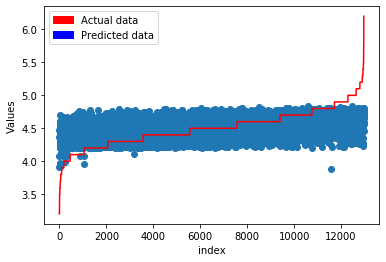

,t + 1,pred (t +1)
9680,5.5,4.650717
906,5.6,4.770723
437,5.6,4.753439
2166,5.6,4.674054
3418,5.6,4.588829
2664,5.7,4.665363
8528,5.7,4.758902
4948,5.8,4.700518
10950,5.8,4.806887
10936,6.2,4.579792


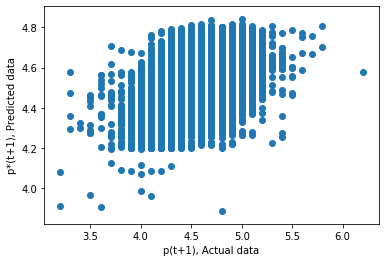

In [18]:

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.tail(10)

In [19]:
# tempdata=pd.DataFrame(xtest.copy())
# tempdata['ytest']=ytest
# # temp=temp.dropna()
# # tempdata.head()
# # tempdata[tempdata.ytest.isna()].index

# tempdata=tempdata.drop(tempdata[tempdata.ytest.isna()].index)


xg boost
==========

In [20]:
import xgboost as xgb
# from sklearn.metrics import mean_squared_error
# import pandas as pd
# import numpy as np

In [21]:
xg_reg = xgb.XGBRegressor()
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, 
#                           learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(xtrain, ytrain) 

[02:47:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [22]:

ypred = xg_reg.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

# ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
# ypredPD['t + 1']=ytest.values
# ypredPD['pred (t +1)']=ypred
# ypredPD.head(10)

mean_squared_error 0.05541948773527681
root mean_squared_error 0.23541344000561398
mean_absolute_error 0.18114071140862834
r2_score 0.2320765072807961


In [23]:
# ytest[ytest.isna()].shape
# tempdata.iloc[:,-1]

ANN
==========

In [58]:
model= Sequential()
model.add(Dense(input_dim=29,units=128,activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=128, activation='relu', kernel_initializer='uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=32, activation='relu', kernel_initializer='uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=1, kernel_initializer='uniform'))
model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mean_squared_error' ])

In [59]:
h=model.fit(xtrain, ytrain, validation_split=.2,epochs=100, batch_size=50)

Train on 23032 samples, validate on 5759 samples
Epoch 1/100
23032/23032 [==============================] - 3s 120us/step - loss: 118.7340 - mean_squared_error: 118.7340 - val_loss: 19.8389 - val_mean_squared_error: 19.8389
Epoch 2/100
23032/23032 [==============================] - 1s 51us/step - loss: 25.9030 - mean_squared_error: 25.9030 - val_loss: 10.8667 - val_mean_squared_error: 10.8667
Epoch 3/100
23032/23032 [==============================] - 1s 51us/step - loss: 22.3034 - mean_squared_error: 22.3034 - val_loss: 10.7477 - val_mean_squared_error: 10.7477
Epoch 4/100
23032/23032 [==============================] - 1s 51us/step - loss: 20.5817 - mean_squared_error: 20.5817 - val_loss: 10.7501 - val_mean_squared_error: 10.7501
Epoch 5/100
23032/23032 [==============================] - 1s 50us/step - loss: 18.8789 - mean_squared_error: 18.8789 - val_loss: 11.0220 - val_mean_squared_error: 11.0220
Epoch 6/100
23032/23032 [==============================] - 1s 51us/step - loss: 17.3384 

Epoch 49/100
23032/23032 [==============================] - 1s 50us/step - loss: 9.1582 - mean_squared_error: 9.1582 - val_loss: 8.8271 - val_mean_squared_error: 8.8271
Epoch 50/100
23032/23032 [==============================] - 1s 50us/step - loss: 9.1611 - mean_squared_error: 9.1611 - val_loss: 8.8421 - val_mean_squared_error: 8.8421
Epoch 51/100
23032/23032 [==============================] - 1s 50us/step - loss: 9.1775 - mean_squared_error: 9.1775 - val_loss: 8.8505 - val_mean_squared_error: 8.8505
Epoch 52/100
23032/23032 [==============================] - 1s 50us/step - loss: 9.1786 - mean_squared_error: 9.1786 - val_loss: 8.7868 - val_mean_squared_error: 8.7868
Epoch 53/100
23032/23032 [==============================] - 1s 50us/step - loss: 9.1790 - mean_squared_error: 9.1790 - val_loss: 8.8795 - val_mean_squared_error: 8.8795
Epoch 54/100
23032/23032 [==============================] - 1s 50us/step - loss: 9.1755 - mean_squared_error: 9.1755 - val_loss: 9.1229 - val_mean_squared_

In [60]:
ypred=model.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

mean_squared_error 3.2517443494341
root mean_squared_error 1.8032593683200706
mean_absolute_error 1.3202867395846702
r2_score 0.6421986533601264


,t + 1,pred (t +1)
0,17.8,19.481968
1,21.6,19.718412
2,24.1,22.552965
3,23.5,21.673393
4,27.5,23.912336
5,20.4,19.873095
6,19.5,19.901802
7,18.3,19.374771
8,27.0,25.263119
9,18.0,19.727901


dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


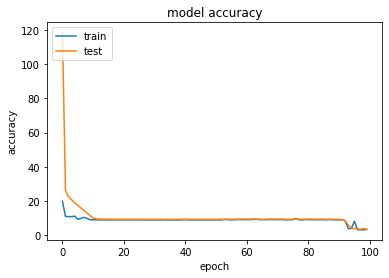

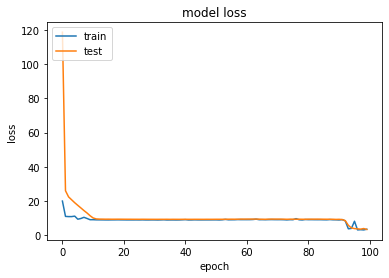

In [61]:
history=h
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
ypredPD['diff']=abs(ypredPD['t + 1']- ypredPD['pred (t +1)'])
print(np.mean(ypredPD['diff']))
print(np.std(ypredPD['diff']))
print(100*ypredPD[ypredPD['diff']<=5].shape[0]/ypredPD.shape[0])

1.3202867395846738
1.2282456084639513
98.37454848569047


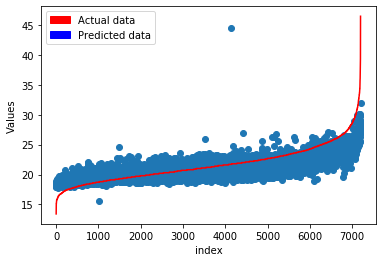

,t + 1,pred (t +1),diff
2419,13.4,18.191751,4.791751
2464,15.0,17.902821,2.902821
1788,15.0,18.570789,3.570789
2690,15.1,18.881800,3.781800
5780,15.1,18.492310,3.392310
2730,15.2,18.174953,2.974953
3299,15.4,18.548992,3.148992
2230,15.4,17.965977,2.565977
1692,15.5,18.641792,3.141792
1494,15.6,17.876085,2.276085


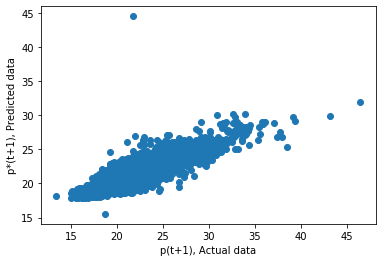

In [63]:

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.head(10)

SVR
======

In [ ]:
from sklearn.svm import SVR
# svr_rbf = SVR(kernel='rbf', C=10, gamma=0.02, epsilon=.001)
svr_rbf = SVR(kernel='rbf')

In [ ]:
svr_rbf.fit(xtrain, ytrain) 

In [ ]:
ypred=svr_rbf.predict(xtest)

In [ ]:
import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)